### Robust Classification for Imprecise Environments

Markos Flavio B. G. O.

__Context: Dynamic selection of classifiers.__

### Introduction

This Notebook partially implements the dynamic selection of classifiers strategy developed in __Provost, Robust Classification for Imprecise Environments__. Below there's a brief summary of the strategy.

The aim of the approach is to develop a robust classifier, which are tolerant to the uncertainties presented in class distributions and misclassification costs. It actually employs a dynamic classifier selection based on current costs (which can be specified at run time by sampling from populations) and distributions, which is appropriate for cases that comprehend incremental learning systems with dynamic behavior. A hybrid classification system is built from the available classifiers using the ROC convex hull (ROCCH) strategy. Three high-level principles are involved in ROOCH: building the ROC curves of individual classifiers, that embed individual performances; project onto ROC curves the analytic information (iso-performance curves) based on current distributions; and build the convex hull of the set, highlighting the potential optimal classifiers.

Each scenario (of cost and class distributions) define a family of iso performance lines in the convex hull of the available classifiers. The (dynamically) selected classifier is the one whose any point intersection with the iso-performance line (tangent with respect to ROCCH) returns the highest TP intersect. The ‘best intersection’ point varies according different conditions, as the chosen classifier.

New classifiers can be added incrementally and bad ones can be discarded without any issue. As a new classifier is included, the new convex hull have to be evaluated. If it has any point on the new CH (or extended the old one), it is maintained, otherwise, it’s discarded. Changing the target conditions is also easy. It’s required just the slope evaluation of the (new) iso-performance family and the projection on the current CH.

### TEST DATA

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.spatial import ConvexHull
from adjustText import adjust_text
import pickle
from sklearn.ensemble import VotingClassifier

In [2]:
bc = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(bc['data'], bc['target'], random_state=0)

Acc:  0.9230769230769231


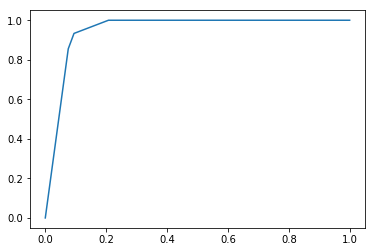

In [3]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_probs = knn.predict_proba(X_test)
fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test, [p[1] for p in knn_probs])
plt.plot(fpr_knn, tpr_knn)
print('Acc: ', knn.score(X_test, y_test))

Acc:  0.958041958041958


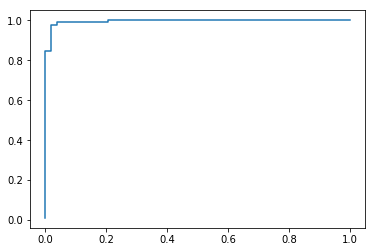

In [4]:
lr = LogisticRegression().fit(X_train, y_train)
lr_probs = lr.predict_proba(X_test)
fpr_lr, tpr_lr, _ = metrics.roc_curve(y_test, [p[1] for p in lr_probs])
plt.plot(fpr_lr, tpr_lr)
print('Acc: ', lr.score(X_test, y_test))

Acc:  0.916083916083916


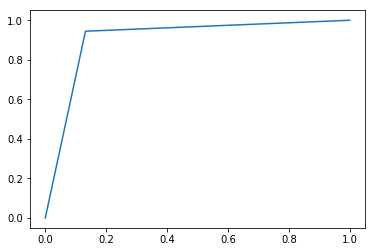

In [5]:
knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X_train, y_train)
knn2_probs = knn2.predict_proba(X_test)
fpr_knn2, tpr_knn2, _ = metrics.roc_curve(y_test, [p[1] for p in knn2_probs])
plt.plot(fpr_knn2, tpr_knn2)
print('Acc: ', knn2.score(X_test, y_test))

### TESTING 1.0 - Building the ROCCH

In [6]:
X_val, y_val, models, models_data, models_ths, rocch = initialize_data('', X_test, y_test)

NameError: name 'initialize_data' is not defined

New classifier added to the pool
No other models were discarded.
Models:  [KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')]
Models FPR and TPR data:  [array([[0.        , 0.        ],
       [0.13207547, 0.94444444],
       [1.        , 1.        ]])]
Models thresholds:  [array([2., 1., 0.])]
Current Convex ROC:  [[0.         0.        ]
 [0.13207547 0.94444444]
 [1.         1.        ]]


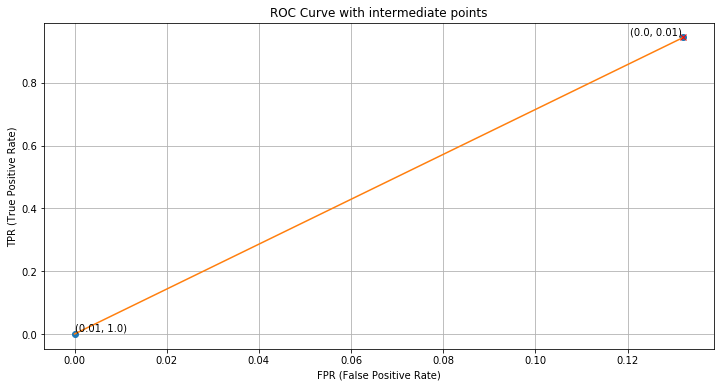

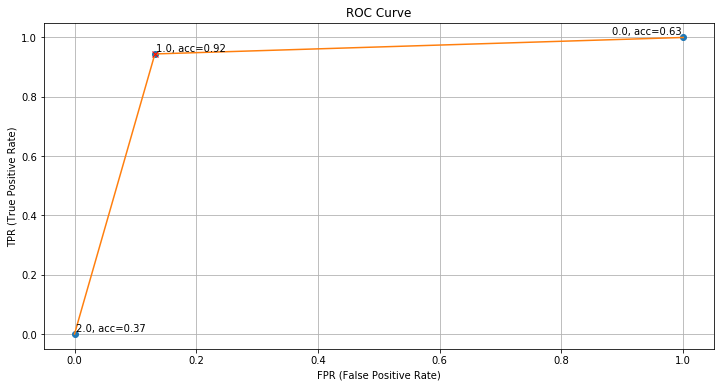

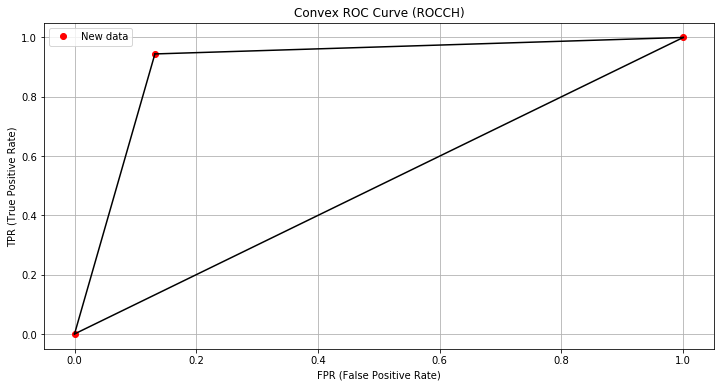

In [317]:
models, models_data, models_ths, rocch =  add_classifier(knn2, X_val, y_val, models, models_data, models_ths, rocch, prt=True)
print('Models: ', models)
print('Models FPR and TPR data: ', models_data)
print('Models thresholds: ', models_ths)
print('Current Convex ROC: ', rocch)

New classifier added to the pool
The following 1 model(s) was(were) discarded.
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
Models:  [LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)]
Models FPR and TPR data:  [array([[0.        , 0.        ],
       [0.        , 0.01111111],
       [0.        , 0.84444444],
       [0.01886792, 0.84444444],
       [0.01886792, 0.97777778],
       [0.03773585, 0.97777778],
       [0.03773585, 0.98888889],
       [0.20754717, 0.98888889],
       [0.20754717, 1.        ],
       [1.        , 1.        ]])]
Models thresholds:  [array([1.00000000e+00, 9.99915633e-01, 8.59174598e-01, 8.47680283e-01,
       3.58879658e-01, 3.11593

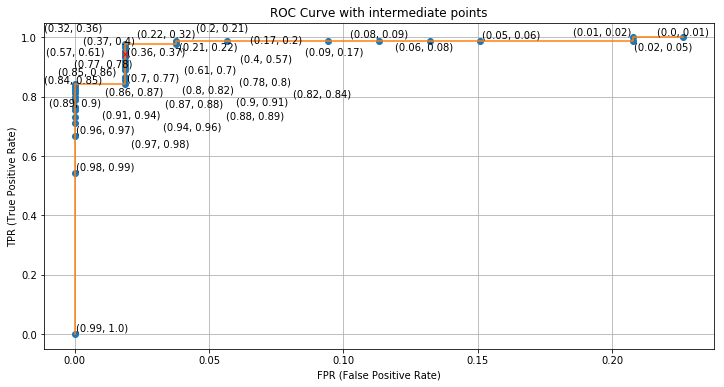

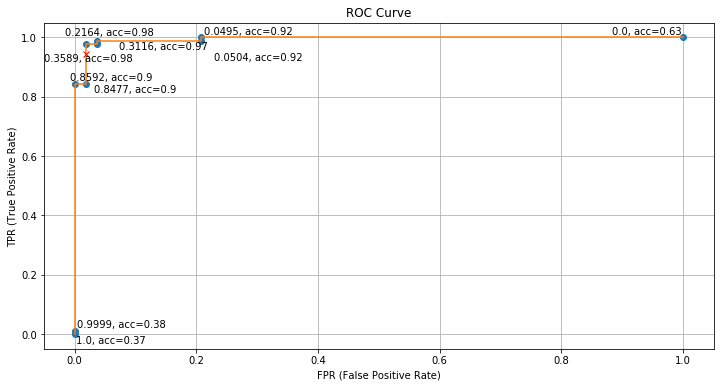

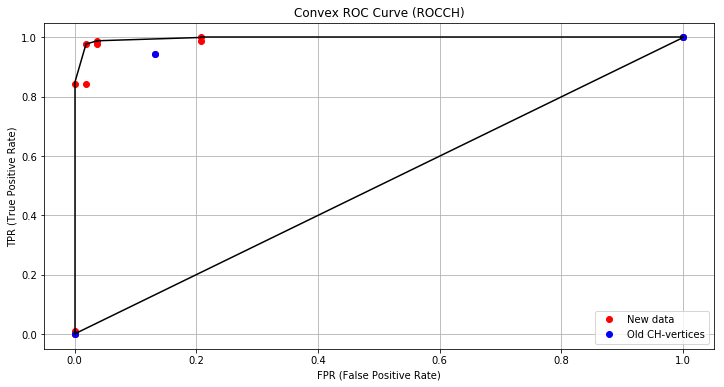

In [318]:
models, models_data, models_ths, rocch =  add_classifier(lr, X_val, y_val, models, models_data, models_ths, rocch, prt=True)
print('Models: ', models)
print('Models FPR and TPR data: ', models_data)
print('Models thresholds: ', models_ths)
print('Current Convex ROC: ', rocch)

New classifier added to the pool
No other models were discarded.
Models:  [LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')]
Models FPR and TPR data:  [array([[0.        , 0.        ],
       [0.        , 0.01111111],
       [0.        , 0.84444444],
       [0.01886792, 0.84444444],
       [0.01886792, 0.97777778],
       [0.03773585, 0.97777778],
       [0.03773585, 0.98888889],
       [0.20754717, 0.98888889],
       [0.20754717, 1.        ],
       [1.        , 1.        ]]), array([[0.        , 0.        ],
       [0.0754717 , 0.85555556],
       [0.09433962, 0.93333333],
       [0.20754717, 1.        ],
   

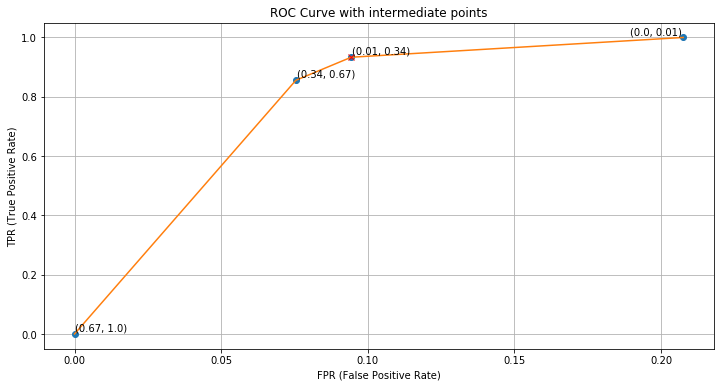

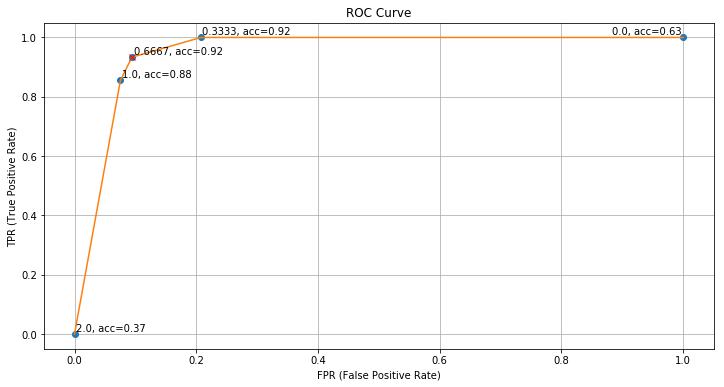

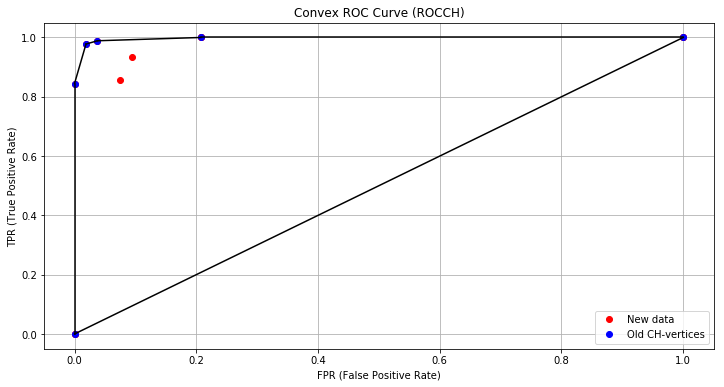

In [319]:
models, models_data, models_ths, rocch =  add_classifier(knn, X_val, y_val, models, models_data, models_ths, rocch, prt=True)
print('Models: ', models)
print('Models FPR and TPR data: ', models_data)
print('Models thresholds: ', models_ths)
print('Current Convex ROC: ', rocch)

### TESTING 2.0 - Making predictions

Classifier:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Threshold:  0.2164129477737847
Prediction:  [False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True False False False False False  True  True
 False  True  True False  True False  True False  True False  True False
  True False  True False False  True False  True False False  True  True
  True False False  True False  True  True  True  True  True  True False
 False False  True  True False  True False False False  True  True False
  True  True False  True  True  True  True  True False False False  True
 False  True  True  True False False  True False  True False  True  True
 False  True  True  True  True  True  True  True False  True False  True
 False False  True Fal

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False, False,  True,  True, False,  True,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False, False,  True, False,  True, False,
       False,  True,  True,  True, False, False,  True, False,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True, False,  True, False, False, False,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True, False,
       False, False,  True, False,  True,  True,  True, False, False,
        True, False,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
       False, False,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,

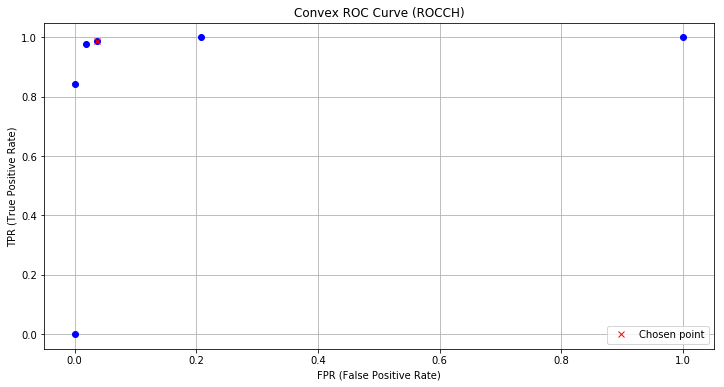

In [352]:
make_prediction(1, 1, 0.5, 0.5, X_val, models, models_data, models_ths, rocch, prt=True)

### ROCCH APPROACH

In [7]:
def initialize_data(pkl_path, X_val, y_val):
    # loading existing data
    try:
        raw_data = pickle.load(open(pkl_path, "rb"))
        X_val, y_val, models, models_data, models_ths, rocch = raw_data
        return X_val, y_val, models, models_data, models_ths, rocch
    except (OSError, IOError) as e:
        print('File not found.')
        return X_val, y_val, [], [], [], []

In [8]:
def add_classifier(model, X_val, y_val, models, models_data, models_ths, rocch, prt=True):
    fpr, tpr, ths = build_roc(model, X_val, y_val, prt=prt)
    data = np.array([fpr, tpr]).transpose()
    result, rocch = roc_convex_hull(data, rocch, prt=prt)
    if result:
        print('New classifier added to the pool')
        # test if all other classifiers are not in the CH anymore:
        discarded_models = []
        for i, cdat in enumerate(models_data):
            cdat = cdat[1:-1]
            intersect = np.array([x for x in set(tuple(x) for x in cdat) & set(tuple(x) for x in rocch)])
            if not list(intersect):
                discarded_models.append(i)
        if not discarded_models:
            print('No other models were discarded.')
        else:
            print('The following', len(discarded_models), 'model(s) was(were) discarded.')
            for i in discarded_models:
                print(models[i])
        models = [i for j, i in enumerate(models) if j not in discarded_models]
        models_data = [i for j, i in enumerate(models_data) if j not in discarded_models]
        models_ths = [i for j, i in enumerate(models_ths) if j not in discarded_models]
        #append the new model
        models_data.append(data)
        models.append(model)
        models_ths.append(ths)
    else:
        print('New classifier discarded.')
    return models, models_data, models_ths, rocch

In [9]:
def build_roc(model, X_val, y_val, prt=True):
    
    if hasattr(model, 'predict_proba'):
        preds = model.predict_proba(X_val)
    elif hasattr(model, 'decision_function'):
        preds = model.decision_function(X_val)
    else:
        print('Error. Model not allowed.')
        
    fpr, tpr, thresholds = metrics.roc_curve(y_val, [p[1] for p in preds]) #assuming that the second class is the positive and the minor one
    #add the first and last coordinate if necessary
    if not (fpr[0] == 0 and tpr[0] == 0):
        fpr = np.insert(fpr, 0, 0)
        tpr = np.insert(tpr, 0, 0)
        thresholds = np.insert(thresholds, 0, 1.0)
    if not (fpr[-1] == 1 and tpr[-1] == 1):
        fpr = np.append(fpr, 1)
        tpr = np.append(tpr, 1)
        thresholds = np.append(thresholds, 0.0)
    if prt:
        #print detailed range information
        expanding_thresholds(model, X_val, y_val)
        
        #Gathering accuracy information
        labels = []
        for ths in thresholds:
            y_pred = (model.predict_proba(X_val)[:,1] >= ths)
            acc = np.mean(y_pred == y_val)
            labels.append(str(round(ths, 4))+', acc='+str(round(acc, 2)))
        
        plt.figure(figsize=(12, 6))
        #Treshold points
        plt.plot(fpr, tpr, 'o')
        texts = [plt.text(fpr[i], tpr[i], labels[i]) for i in range(len(fpr))]
        adjust_text(texts)
        plt.plot(fpr, tpr)
        #0.5 point
        y_pred = (model.predict_proba(X_val)[:,1] >= 0.5)
        tn, fp, fn, tp = metrics.confusion_matrix(y_val, y_pred).ravel()
        tpr_05 = tp/(tp+fn)
        fpr_05 = fp/(tn+fp)
        plt.plot(fpr_05, tpr_05, 'rx')
        
        plt.xlabel('FPR (False Positive Rate)')
        plt.ylabel('TPR (True Positive Rate)')
        plt.title('ROC Curve')
        plt.grid()
    return fpr, tpr, thresholds

In [10]:
def expanding_thresholds(model, X_val, y_val):
    
    x = np.arange(1., 0, -0.01); x = np.append(x, 0.00)
    fprs = []; tprs = []
    for ths in x:
        if ths == 1:
            fprs.append(1.0); tprs.append(1.0)
        else:
            y_pred = (model.predict_proba(X_val)[:,1] >= ths)
            tn, fp, fn, tp = metrics.confusion_matrix(y_val, y_pred).ravel()
            tprs.append(tp/(tp+fn))
            fprs.append(fp/(tn+fp))

    fprs_final = []; tprs_final = []
    thresholds_final = []
    for i, (fpr, tpr) in enumerate(zip(fprs[:-1], tprs[:-1])):
        if fprs[i+1] > fprs[i] or tprs[i+1] > tprs[i]:
            fprs_final.append(fprs[i])
            tprs_final.append(tprs[i])
            thresholds_final.append(x[i])
    if not (fprs_final[0] == 0 and tprs_final[0] == 0):
        fprs_final = np.insert(fprs_final, 0, 0)
        tprs_final = np.insert(tprs_final, 0, 0)
        thresholds_final = np.insert(thresholds_final, 0, 1.0)
    if not (fprs_final[-1] == 1 and tprs_final[-1] == 1):
        fprs_final = np.append(fprs_final, 1)
        tprs_final = np.append(tprs_final, 1)
        thresholds_final = np.append(thresholds_final, 0.0)
    
    t_limits = eval_threshold_limits(thresholds_final)
    t_limits_str = []
    for t in t_limits:
        t_limits_str.append('('+str(t[0])+', '+str(t[1])+')')
    plt.figure(figsize=(12, 6))    
    plt.plot(fprs_final[:-1], tprs_final[:-1], 'o') # last point is omited to enhance visualization
    texts = [plt.text(fprs_final[i], tprs_final[i], t_limits_str[i]) for i in range(len(fprs_final)-1)]
    adjust_text(texts)
    plt.plot(fprs_final[:-1], tprs_final[:-1])
    
    #0.5 point
    y_pred = (model.predict_proba(X_val)[:,1] >= 0.5)
    tn, fp, fn, tp = metrics.confusion_matrix(y_val, y_pred).ravel()
    tpr_05 = tp/(tp+fn)
    fpr_05 = fp/(tn+fp)
    plt.plot(fpr_05, tpr_05, 'rx')
    
    plt.xlabel('FPR (False Positive Rate)')
    plt.ylabel('TPR (True Positive Rate)')
    plt.title('ROC Curve with intermediate points')
    plt.grid()
    return

In [11]:
def eval_threshold_limits(thresholds):
    thresholds_limits = [] #(min, max) values of thresholds (rounded)
    thresholds = np.array([round(elem, 4) for elem in thresholds]) #precise border values are not important
    for i, th in enumerate(thresholds):
        if i == 0:
            thresholds_limits.append((thresholds[i+1], 1.0))
        elif i == thresholds.size-1:
            thresholds_limits.append((0.0, 0.0))
        else:
            if th == 1:
                thresholds_limits.append((thresholds[i+1], 0.999))
            else:
                thresholds_limits.append((thresholds[i+1], thresholds[i])) 
    return thresholds_limits

In [12]:
def roc_convex_hull(data, rocch, prt=True):
    """Computes the convex hull of a set of points.
        
    Keyword arguments:
    data (ndarray) -- m x 2 ndarray, where the first column is the FPRs.
    prt (Boolean) -- specifies if the convex hull is printed.
    """
    if not list(rocch): # first classifier
        hull = ConvexHull(data)
        if prt:
            plt.figure(figsize=(12, 6))
            plt.plot(data[:,0], data[:,1], 'ro', label = 'New data')
            for simplex in hull.simplices:
                plt.plot(data[simplex, 0], data[simplex, 1], 'k-')
            plt.xlabel('FPR (False Positive Rate)')
            plt.ylabel('TPR (True Positive Rate)')
            plt.title('Convex ROC Curve (ROCCH)')
            plt.legend()
            plt.grid()
        rocch = data
        return True, rocch
    else:
        all_data = np.vstack([data, rocch])
        hull = ConvexHull(all_data)
        if prt:
            plt.figure(figsize=(12, 6))
            plt.plot(all_data[:,0], all_data[:,1], 'ro', label = 'New data')
            plt.plot(rocch[:,0], rocch[:,1], 'bo', label = 'Old CH-vertices')
            for simplex in hull.simplices:
                plt.plot(all_data[simplex, 0], all_data[simplex, 1], 'k-')
            plt.xlabel('FPR (False Positive Rate)')
            plt.ylabel('TPR (True Positive Rate)')
            plt.title('Convex ROC Curve (ROCCH)')
            plt.legend()
            plt.grid()
        
        #check if the CH was extended:
        extension = False
        for index in hull.vertices:
            if index < data.shape[0]: # some classifier data was added to the hull
                if (not np.array_equal(data[index], np.array([0., 0.]))) and (not np.array_equal(data[index], np.array([1., 1.]))):
                    extension = True
                    break
        if extension:
            rocch = all_data[hull.vertices]
            return True, rocch
        else:
            return False, rocch

In [13]:
def make_prediction(FP_cost, FN_cost, pp, pn, X_test, models, models_data, models_ths, rocch, prt=True):
    rocch = rocch[rocch[:,0].argsort()]
    mec = (FP_cost*pn)/(FN_cost*pp); mec = round(mec, 2)
    slopes = []
    for i, point in enumerate(rocch[:-1]):
        if rocch[i+1][0] == point[0]:
            slope = 10**6
        else:
            slope = (rocch[i+1][1] - point[1])/(rocch[i+1][0] - point[0])
        slopes.append(slope)
    slopes = [round(elem, 2) for elem in slopes]

    if mec in slopes: # there's a slope with mec cost (rarest case)
        #reference_point = rocch[slopes.index(mec)]
        reference_point = rocch[slopes.index(mec)+1] #the rightmost point is taken
    else:
        slopes.append(mec); slopes.sort()
        reference_point = rocch[slopes.index(mec)]
    if prt:
        plt.figure(figsize=(12, 6))
        plt.plot(rocch[:,0], rocch[:,1], 'bo')
        plt.plot(reference_point[0], reference_point[1], 'rx', label='Chosen point')
        plt.xlabel('FPR (False Positive Rate)')
        plt.ylabel('TPR (True Positive Rate)')
        plt.title('Convex ROC Curve (ROCCH)')
        plt.legend()
        plt.grid()
    
    load_classifiers_idx = []; load_ths = [] #at least one will be selected
    for i, cdat in enumerate(models_data):
        result = np.where(np.all(cdat==reference_point,axis=1))
        if list(result[0]): # at least one model will be selected
            load_classifiers_idx.append(i)
            load_ths.append(models_ths[i][result[0][0]])
    
    return class_prediction(load_classifiers_idx, load_ths, models, X_test, prt=prt)        

In [14]:
def class_prediction(load_classifiers_idx, load_ths, models, X_test, prt=True):  
    if len(load_classifiers_idx) == 1:
        if prt:
            print('Classifier:')
            print(models[load_classifiers_idx[0]])
            prediction = models[load_classifiers_idx[0]].predict_proba(X_test)[:,1] >= load_ths[0]
            print('Threshold: ', load_ths[0])
            print('Prediction: ', prediction)
        return prediction
    else: # hard majority voting  
        prediction = 1*(models[load_classifiers_idx[0]].predict_proba(X_test)[:,1] >= load_ths[0])
        for idx in load_classifiers_idx[:1]:
            prediction = prediction + 1*(models[load_classifiers_idx[idx]].predict_proba(X_test)[:,1] >= load_ths[idx])
        prediction = prediction/(len(load_classifiers_idx)) >= (len(load_classifiers_idx)/2) # ties are predicted as positive
        return prediction